Hi I'm mra503, this is developed and designed by me.
This Notebook uses data from Kaggle, and predicts the possible obesity type..

Step 1: Cleaning the data i.e converting the categorical data...
VARIABLE ENCODING

In step 1, Used LeaveoneOut encoder to the encoding,
and then normalization is done
Step 2: Extracting the best possible features from 17 odd features

In step 2, used correlation to get a heat map, and then extracted the best possible features

Step3: Training model using those features (used polynomial regression as I'm using 7 odd features)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv', encoding='ISO-8859-2')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS), other variables obtained were: Gender, Age, Height and Weight. Finally, all data was labeled and the class variable NObesity was created with the values of: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III

#Data goes like this

What is your gender?	
•
Female

•
Male

¿what is your age?	Numeric value
¿what is your height?	Numeric value in meters
¿what is your weight?	Numeric value in kilograms
¿Has a family member suffered or suffers from overweight?	
•
Yes

•
No

¿Do you eat high caloric food frequently?	
•
Yes

•
No

¿Do you usually eat vegetables in your meals?	
•
Never

•
Sometimes

•
Always

¿How many main meals do you have daily?	
•
Between 1 y 2

•
Three

•
More than three

¿Do you eat any food between meals?	
•
No

•
Sometimes

•
Frequently

•
Always

¿Do you smoke?	
•
Yes

•
No

¿How much water do you drink daily?	
•
Less than a liter

•
Between 1 and 2 L

•
More than 2 L

¿Do you monitor the calories you eat daily?	
•
Yes

•
No

¿How often do you have physical activity?	
•
I do not have

•
1 or 2 days

•
2 or 4 days

•
4 or 5 days

¿How much time do you use technological devices such as cell phone, videogames, television, computer and others?	
•
0–2 hours

•
3–5 hours

•
More than 5 hours

¿how often do you drink alcohol?	
•
I do not drink

•
Sometimes

•
Frequently

•
Always

¿Which transportation do you usually use?	
•
Automobile

•
Motorbike

•
Bike

•
Public Transportation

•
Walking

In [ ]:
print(df.shape)
X=df.loc[:,:'MTRANS']
X.shape
y=df['NObeyesdad']

y=y.astype('category')
y.head

#y.shape

(2111, 17)


<bound method NDFrame.head of 0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: category
Categories (7, object): ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II',
                         'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']>

In [ ]:
X.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
dtype: object

In [ ]:
obj_X = X.select_dtypes(include=['object']).copy()
obj_X.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation
3,Male,no,no,Sometimes,no,no,Frequently,Walking
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation


Now converting this oject to categorical 

In [ ]:
pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.2.2)


In [ ]:
pure_y=y.cat.codes
print(df.columns)
print(df.head)

from category_encoders import leave_one_out as loo
ec = loo.LeaveOneOutEncoder()

LOO = ec.fit(obj_X, pure_y)
X_LOO = ec.transform(obj_X).round(2)
X_LOO.columns = obj_X.columns
print(X_LOO.columns)
X_LOO.head()
CategoricalArra=[[],[],[],[],[],[],[],[]]

Arra=[[],[],[],[],[],[],[],[]]
def Catdict(xxx,arr):
  Arra=arr
  for index, row in xxx.iterrows():
    if row['Gender'] not in Arra[0]:
      
      Arra[0].append(row['Gender'])
    
    
    if row['family_history_with_overweight'] not in Arra[1]:
      
      Arra[1].append(row['family_history_with_overweight'])
    
    
    if row['FAVC'] not in Arra[2]:
      
      Arra[2].append(row['FAVC'])
    
    
    if row['CAEC'] not in Arra[3]:
      
      Arra[3].append(row['CAEC'])
    
    
    if row['SMOKE'] not in Arra[4]:
      
      Arra[4].append(row['SMOKE'])
    
    
    if row['SCC'] not in Arra[5]:
      
      Arra[5].append(row['SCC'])
    
    
    if row['CALC'] not in Arra[6]:
      
      Arra[6].append(row['CALC'])
    
    
    if row['MTRANS'] not in Arra[7]:
      
      Arra[7].append(row['MTRANS'])
    
    
    if index>2000:
      return Arra
print(obj_X.columns)
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
<bound method NDFrame.head of       Gender        Age  ...                 MTRANS           NObeyesdad
0     Female  21.000000  ...  Public_Transportation        Normal_Weight
1     Female  21.000000  ...  Public_Transportation        Normal_Weight
2       Male  23.000000  ...  Public_Transportation        Normal_Weight
3       Male  27.000000  ...                Walking   Overweight_Level_I
4       Male  22.000000  ...  Public_Transportation  Overweight_Level_II
...      ...        ...  ...                    ...                  ...
2106  Female  20.976842  ...  Public_Transportation     Obesity_Type_III
2107  Female  21.982942  ...  Public_Transportation     Obesity_Type_III
2108  Female  22.524036  ...  Public_Transportation     Obesity_Type_III
2109  Female  24.361936 

(['Gender',
  'family_history_with_overweight',
  'FAVC',
  'CAEC',
  'SMOKE',
  'SCC',
  'CALC',
  'MTRANS'],)

In [ ]:
cate=Catdict(obj_X,CategoricalArra)
val=Catdict(X_LOO,Arra)
print(cate)
print(val)
def mkadict(aaa,bbb):
  boom={}
  for iterr in range(len(aaa)):
    for iterR in range(len(aaa[iterr])):
      boom[aaa[iterr][iterR]]=bbb[iterr][iterR]
  return boom
print(mkadict(cate,val))

[['Female', 'Male'], ['yes', 'no'], ['no', 'yes'], ['Sometimes', 'Frequently', 'Always', 'no'], ['no', 'yes'], ['no', 'yes'], ['no', 'Sometimes', 'Frequently', 'Always'], ['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike']]
[[2.97, 3.06], [3.3, 1.72], [2.78, 3.05], [3.29, 1.11, 1.81, 3.84], [3.02, 2.7], [3.04, 2.56], [2.62, 3.17, 3.51, 3.02], [3.01, 2.14, 3.17, 2.09, 2.43]]
{'Female': 2.97, 'Male': 3.06, 'yes': 2.56, 'no': 2.62, 'Sometimes': 3.17, 'Frequently': 3.51, 'Always': 3.02, 'Public_Transportation': 3.01, 'Walking': 2.14, 'Automobile': 3.17, 'Motorbike': 2.09, 'Bike': 2.43}


Gender={"Female":2.97,"Male":3.06}

##Conversion is completed

In [ ]:
Float_X=X.select_dtypes(include=["float64"]).copy()

print(Float_X.head())

import pandas as pd
from sklearn import preprocessing

#Concatinating both the dfs

pure_X=pd.concat([X_LOO,Float_X],axis=1)
print(pure_X.head())

x = pure_X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
pr=min_max_scaler.get_params()
print(pr)
norm_X = pd.DataFrame(x_scaled,columns=pure_X.columns,index=pure_X.index)
print(norm_X.head)

    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0
   Gender  family_history_with_overweight  FAVC  CAEC  ...  NCP  CH2O  FAF  TUE
0    2.97                            3.30  2.78  3.29  ...  3.0   2.0  0.0  1.0
1    2.97                            3.30  2.78  3.29  ...  3.0   3.0  3.0  0.0
2    3.06                            3.30  2.78  3.29  ...  3.0   2.0  2.0  1.0
3    3.06                            1.72  2.78  3.29  ...  3.0   2.0  2.0  0.0
4    3.06                            1.72  2.78  3.29  ...  1.0   2.0  0.0  0.0

[5 rows x 16 columns]
{'copy': True, 'feature_range': (0, 1)}
<bound method NDFrame.head of       Gender  family_history_with_overweight  ...       FAF       TUE
0        0.0                             1.0  ...  

Categories (7, object): ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II',
                         'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pure_X, pure_y, test_size=0.30, random_state=1, stratify=y)
X_trlabels=X_train.columns

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train.head())
print(y_train.head)
print(X_test.head)
print(y_test.head)

(1477, 16)
(1477,)
(634, 16)
(634,)
      Gender  family_history_with_overweight  ...       FAF       TUE
1595    3.06                             3.3  ...  1.299469  0.000000
1511    3.06                             3.3  ...  2.240500  0.000000
1561    3.06                             3.3  ...  0.668963  0.000000
1703    3.06                             3.3  ...  0.796770  0.000000
890     2.97                             3.3  ...  0.104451  1.899073

[5 rows x 16 columns]
<bound method NDFrame.head of 1595    3
1511    2
1561    3
1703    3
890     5
       ..
1242    2
1931    4
745     5
528     0
934     5
Length: 1477, dtype: int8>
<bound method NDFrame.head of       Gender  family_history_with_overweight  ...       FAF       TUE
140     3.06                             3.3  ...  1.000000  1.000000
1881    2.97                             3.3  ...  0.336795  0.153462
2087    2.97                             3.3  ...  0.000000  0.224655
1176    2.97                             3.3

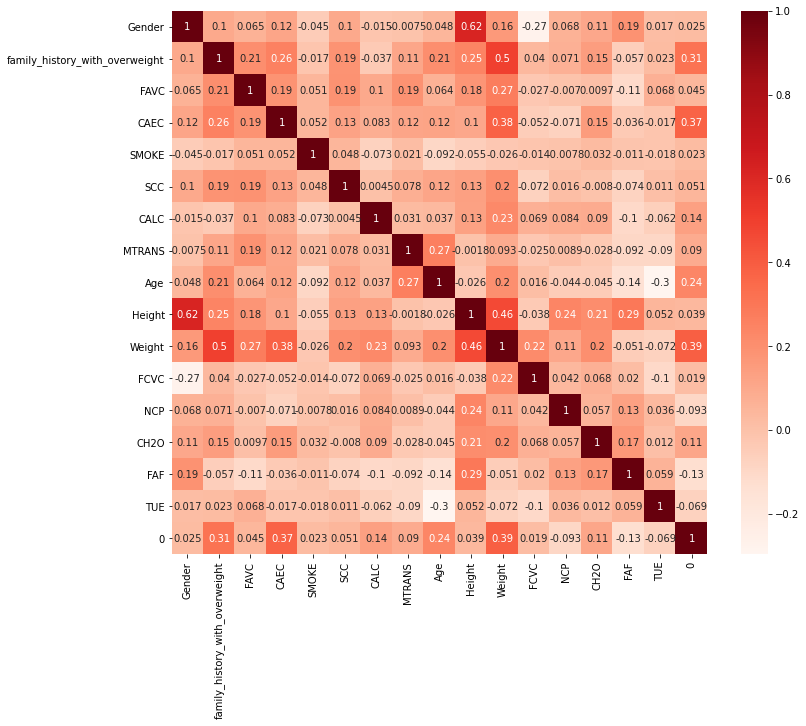

(2111, 17)
(2111,)
(2111, 16)


In [ ]:
#Using Pearson Correlation

import matplotlib.pyplot as plt
import seaborn as sns

wholedf=pd.concat([norm_X,pure_y],axis=1)
plt.figure(figsize=(12,10))
cor = wholedf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
print(wholedf.shape)
print(pure_y.shape)
print(norm_X.shape)




##From the figure 
The important features are: 


*   family_history_with_overweight
*   CAEC (Consumption of food between meals)
*   Age
*   Weight
*   CALC (Consumption of alcohol)
*   H20  (Consumption of water daily)
*   FAF   (Physical activity frequency)



In [ ]:
norm_X.head
top_features=norm_X[["Age","CAEC","family_history_with_overweight","CALC","Weight","CH2O","FAF"]]
#top_features=norm_X[["Weight"]]

In [ ]:
top_features.head

<bound method NDFrame.head of            Age      CAEC  ...      CH2O       FAF
0     0.148936  0.798535  ...  0.500000  0.000000
1     0.148936  0.798535  ...  1.000000  1.000000
2     0.191489  0.798535  ...  0.500000  0.666667
3     0.276596  0.798535  ...  0.500000  0.666667
4     0.170213  0.798535  ...  0.500000  0.000000
...        ...       ...  ...       ...       ...
2106  0.148443  0.798535  ...  0.364069  0.558756
2107  0.169850  0.798535  ...  0.502565  0.447130
2108  0.181362  0.798535  ...  0.527097  0.471403
2109  0.220467  0.798535  ...  0.926169  0.379702
2110  0.205632  0.798535  ...  0.931757  0.342151

[2111 rows x 7 columns]>

In [ ]:
top_features.shape

(2111, 7)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
weight_dic={'Insufficient_Weight':0, 'Normal_Weight':1, 'Obesity_Type_I':2, 'Obesity_Type_II':3,
                         'Obesity_Type_III':4, 'Overweight_Level_I':5, 'Overweight_Level_II':6}

In [ ]:
p_y=y.map(weight_dic)
X_train, X_test, y_train, y_test = train_test_split(top_features, p_y, test_size=0.10)

from sklearn.preprocessing import PolynomialFeatures
  #17
scores={}
for i in range(1,4):  
  poly = PolynomialFeatures(i)
  xtr=poly.fit_transform(X_train)
  #print(type(X_train))
  #print(type(xtr))
  xts=poly.fit_transform(X_test)
  regr = LogisticRegression(random_state=0).fit(xtr, y_train)
  scores[i]=regr.score(xts,y_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print(scores)

{1: 0.5707547169811321, 2: 0.6839622641509434, 3: 0.7028301886792453}


In [ ]:
from sklearn.externals import joblib
joblib.dump(regr,'ObesemodelPoly3.ml')

['ObesemodelPoly3.ml']

In [ ]:
X_train.columns

Index(['Age', 'CAEC', 'family_history_with_overweight', 'CALC', 'Weight',
       'CH2O', 'FAF'],
      dtype='object')

In [ ]:

xx=poly.fit_transform([[21,1,1,1,80,3,1]])
regr.predict(xx)

array([4])